<a href="https://colab.research.google.com/github/AlfonsoTGarcia-Sosa/ML/blob/master/balanced_myfeats23Jul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-07-23 11:07:57--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88867207 (85M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  84.75M   179MB/s    in 0.5s    

2020-07-23 11:07:57 (179 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [88867207/88867207]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - ca-certificates==2020.1.1=0
    - certifi==2020.4.5.1=py37_0
    - cffi==1.14.0=py37he30daa8_1
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.1=py37h7b6447c_0
    - conda==4.8.3=py37_0
    - c

Set up system, code also works if GPU device not found

In [2]:
import tensorflow as tf
print("tf.__version__: %s" % str(tf.__version__))
device_name = tf.test.gpu_device_name()
if not device_name:
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

tf.__version__: 2.2.0


SystemError: ignored

In [3]:
!git clone https://github.com/deepchem/deepchem.git

Cloning into 'deepchem'...
remote: Enumerating objects: 424, done.
remote: Counting objects: 100% (424/424), done.
remote: Compressing objects: 100% (287/287), done.
remote: Total 34621 (delta 274), reused 235 (delta 137), pack-reused 34197
Receiving objects: 100% (34621/34621), 440.71 MiB | 14.57 MiB/s, done.
Resolving deltas: 100% (25528/25528), done.


In [4]:
%cd deepchem/

/content/deepchem


In [5]:
!python setup.py install

/usr/local/lib/python3.7/site-packages/setuptools/dist.py:454: UserWarning: Normalizing '2.4.0-rc1.dev20200723112912' to '2.4.0rc1.dev20200723112912'
  warnings.warn(tmpl.format(**locals()))
running install
running bdist_egg
running egg_info
creating deepchem.egg-info
writing deepchem.egg-info/PKG-INFO
writing dependency_links to deepchem.egg-info/dependency_links.txt
writing requirements to deepchem.egg-info/requires.txt
writing top-level names to deepchem.egg-info/top_level.txt
writing manifest file 'deepchem.egg-info/SOURCES.txt'
reading manifest file 'deepchem.egg-info/SOURCES.txt'
writing manifest file 'deepchem.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/deepchem
copying deepchem/__init__.py -> build/lib/deepchem
creating build/lib/deepchem/dock
copying deepchem/dock/docking.py -> build/lib/deepchem/dock
copying deepchem/dock/binding_pocket.py -> build/lib/d

In [6]:
import os
import sys
import deepchem as dc
from deepchem.utils.save import load_from_disk

In [7]:
import pandas as pd

In [8]:
print(pd)

<module 'pandas' from '/usr/local/lib/python3.6/dist-packages/pandas/__init__.py'>


In [9]:
from rdkit import Chem

In [10]:
from rdkit.Chem import Draw

In [11]:
from rdkit.Chem import PandasTools

In [12]:
from rdkit.Chem import Descriptors

In [13]:
from rdkit.Chem import rdmolops

In [14]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
data = pd.DataFrame()

In [16]:
pd.__version__

'1.0.5'

Download training set


In [17]:
current_dir = os.path.dirname(os.path.realpath("__file__"))
dc.utils.download_url("https://hermes.chem.ut.ee/~alfx/ML/train.csv",
                      current_dir)

In [18]:
df = pd.read_csv("train.csv")

In [19]:
df_rows, df_cols = df.shape

In [20]:
df

,s_sd_Canonical\_QSARr,s_m_title,HumDockScore,RatDockScore,ChimpDockScore,AVG,bindingClass,P_Act_dockChimp,P_Inact,PredBayes,ratio,cas,casrn,cid,gsid,dsstox_substance_id,preferred_name,Canonical_QSARr,InChI_Code_QSARr,InChI Key_QSARr,BindingClass,avgD_Act,avgD_Inact,PredBindingClass,predMLogR
0,Nc1c(Cl)c([n]c(Cl)c1Cl)C(O)=O,1918-02-1,-5.844028,-7.582837,-6.858417,-6.761761,0,0.117561,0.180008,0,0.653088,1918-02-1,1918-02-1,1160,21160,DTXSID1021160,Picloram,Nc1c(Cl)c([n]c(Cl)c1Cl)C(O)=O,InChI=1S/C6H3Cl3N2O2/c7-1-3(10)2(8)5(9)11-4(1)...,NQQVFXUMIDALNH-UHFFFAOYSA-N,0,0.9257,0.9215,0.012162,0
1,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1C[...,50-27-1,-12.086825,-11.416709,-13.790830,-12.431455,1,0.008682,0.000102,1,84.806906,50-27-1,50-27-1,2366,22366,DTXSID9022366,Estriol,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1C[...,InChI=1S/C18H24O3/c1-18-7-6-13-12-5-3-11(19)8-...,PROQIPRRNZUXQM-ZXXIGWHRSA-N,1,0.8676,0.9291,0.957575,1
2,CC(Cc1cc(O)c(O)cc1)C(C)Cc1cc(O)c(O)cc1,500-38-9,-12.436467,-12.085485,-12.801535,-12.441162,1,0.027501,0.000616,1,44.672972,500-38-9,500-38-9,2437,22437,DTXSID5022437,Nordihydroguaiaretic acid,CC(Cc1cc(O)c(O)cc1)C(C)Cc1cc(O)c(O)cc1,InChI=1S/C18H22O4/c1-11(7-13-3-5-15(19)17(21)9...,HCZKYJDFEPMADG-UHFFFAOYSA-N,1,0.8877,0.8946,0.244343,0
3,C[C@]12CC[C@H]3[C@@H](CC[C@H]4CC(=O)CC[C@@]43C...,521-18-6,-10.234326,0.000000,-12.382423,-7.538916,1,0.041440,0.001224,1,33.866977,521-18-6,521-18-6,2364,22364,DTXSID9022364,5alpha-Dihydrotestosterone,C[C@]12CC[C@H]3[C@@H](CC[C@H]4CC(=O)CC[C@@]43C...,InChI=1S/C19H30O2/c1-18-9-7-13(20)11-12(18)3-4...,NVKAWKQGWWIWPM-ABEVXSGRSA-N,1,0.8909,0.9404,0.840149,1
4,NaN,DB06710,0.000000,0.000000,-12.004982,-4.001661,1,0.057602,0.002189,1,26.319556,NaN,DB06710,NaN,NaN,NaN,NaN,CC12CCC3C(CCC4=CC(=O)CCC43C)C1CCC2(C)O,InChI=1S/C20H30O2/c1-18-9-6-14(21)12-13(18)4-5...,GCKMFJBGXUYNAG-UHFFFAOYSA-N,1,0.8585,0.9245,0.978790,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,NaN,NOCAS_48509,0.000000,0.000000,0.000000,0.000000,0,0.000005,0.002410,0,0.002242,NaN,NOCAS_48509,28483,48509,DTXSID0048509,PharmaGSID_48509,CCCN(C1CCN(CC1)C(=O)C1CCNCC1)[C@H]1Cc2cc(ccc2C...,InChI=1S/C25H39N3O2/c1-3-14-28(23-6-4-19-5-7-2...,KTAULCNFQYFKTN-HSZRJFAPSA-N,0,0.8805,0.8947,0.320631,0
1667,Cc1ccc(c(Cl)c1)C(=O)NS(=O)(=O)/C=C/c1ccc(cc1)OC,NOCAS_48514,-7.993627,0.000000,0.000000,-2.664542,0,0.000005,0.002410,0,0.002242,NaN,NOCAS_48514,28488,48514,DTXSID9048514,PharmaGSID_48514,Cc1ccc(c(Cl)c1)C(=O)NS(=O)(=O)/C=C/c1ccc(cc1)OC,InChI=1S/C17H16ClNO4S/c1-12-3-8-15(16(18)11-12...,WGDPLICUMTVYDB-MDZDMXLPSA-N,0,0.8877,0.8937,0.178343,0
1668,O=C(NS(=O)(=O)/C=C/c1ccccc1)c1ccc(F)cc1Cl,NOCAS_48516,-10.280437,0.000000,0.000000,-3.426812,0,0.000005,0.002410,0,0.002242,NaN,NOCAS_48516,28490,48516,DTXSID9048516,PharmaGSID_48516,O=C(NS(=O)(=O)/C=C/c1ccccc1)c1ccc(F)cc1Cl,InChI=1S/C15H11ClFNO3S/c16-14-10-12(17)6-7-13(...,AUMLVMKWJGCERZ-CMDGGOBGSA-N,0,0.8958,0.8995,0.125889,0
1669,O=C(NS(=O)(=O)/C=C/c1ccc[s]1)c1ccc(F)cc1Br,NOCAS_48518,-9.405784,0.000000,0.000000,-3.135261,0,0.000005,0.002410,0,0.002242,NaN,NOCAS_48518,28492,48518,DTXSID9048518,PharmaGSID_48518,O=C(NS(=O)(=O)/C=C/c1ccc[s]1)c1ccc(F)cc1Br,InChI=1S/C13H9BrFNO3S2/c14-12-8-9(15)3-4-11(12...,QXWJDGMLSMFETH-FNORWQNLSA-N,0,0.9155,0.9161,0.059053,0


In [21]:
PandasTools.AddMoleculeColumnToFrame(df, "Canonical_QSARr","Mol")

Download training set binders



In [22]:
current_dir = os.path.dirname(os.path.realpath("__file__"))
dc.utils.download_url("https://hermes.chem.ut.ee/~alfx/ML/binders.csv",  current_dir)

In [23]:
active_df = pd.read_csv("binders.csv")

In [24]:
active_df_rows, active_df_cols = active_df.shape

In [25]:
active_df

,s_sd_Canonical\_QSARr,s_m_title,HumDockScore,RatDockScore,ChimpDockScore,AVG,bindingClass,P_Act_dockChimp,P_Inact,PredBayes,ratio,cas,casrn,cid,gsid,dsstox_substance_id,preferred_name,SMILES,InChI_Code_QSARr,InChI Key_QSARr,BindingClass,avgD_Act,avgD_Inact,PredBindingClass,predMLogR
0,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1C[...,50-27-1,-12.086825,-11.416709,-13.790830,-12.431455,1,0.008682,0.000102,1,84.806906,50-27-1,50-27-1,2366,22366,DTXSID9022366,Estriol,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1C[...,InChI=1S/C18H24O3/c1-18-7-6-13-12-5-3-11(19)8-...,PROQIPRRNZUXQM-ZXXIGWHRSA-N,1,0.8676,0.9291,0.957575,1
1,CC(Cc1cc(O)c(O)cc1)C(C)Cc1cc(O)c(O)cc1,500-38-9,-12.436467,-12.085485,-12.801535,-12.441162,1,0.027501,0.000616,1,44.672972,500-38-9,500-38-9,2437,22437,DTXSID5022437,Nordihydroguaiaretic acid,CC(Cc1cc(O)c(O)cc1)C(C)Cc1cc(O)c(O)cc1,InChI=1S/C18H22O4/c1-11(7-13-3-5-15(19)17(21)9...,HCZKYJDFEPMADG-UHFFFAOYSA-N,1,0.8877,0.8946,0.244343,0
2,C[C@]12CC[C@H]3[C@@H](CC[C@H]4CC(=O)CC[C@@]43C...,521-18-6,-10.234326,0.000000,-12.382423,-7.538916,1,0.041440,0.001224,1,33.866977,521-18-6,521-18-6,2364,22364,DTXSID9022364,5alpha-Dihydrotestosterone,C[C@]12CC[C@H]3[C@@H](CC[C@H]4CC(=O)CC[C@@]43C...,InChI=1S/C19H30O2/c1-18-9-7-13(20)11-12(18)3-4...,NVKAWKQGWWIWPM-ABEVXSGRSA-N,1,0.8909,0.9404,0.840149,1
3,NaN,DB06710,0.000000,0.000000,-12.004982,-4.001661,1,0.057602,0.002189,1,26.319556,NaN,DB06710,NaN,NaN,NaN,NaN,CC12CCC3C(CCC4=CC(=O)CCC43C)C1CCC2(C)O,InChI=1S/C20H30O2/c1-18-9-6-14(21)12-13(18)4-5...,GCKMFJBGXUYNAG-UHFFFAOYSA-N,1,0.8585,0.9245,0.978790,1
4,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1CC...,50-28-2,-10.560744,-10.890292,-11.979087,-11.143374,1,0.058836,0.002275,1,25.865744,50-28-2,50-28-2,573,20573,DTXSID0020573,17beta-Estradiol,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1CC...,InChI=1S/C18H24O2/c1-18-9-8-14-13-5-3-12(19)10...,VOXZDWNPVJITMN-ZBRFXRBCSA-N,1,0.8610,0.9286,0.979430,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,NaN,NOCAS_47353,0.000000,0.000000,0.000000,0.000000,1,0.000005,0.002410,0,0.002242,NaN,NOCAS_47353,27353,47353,DTXSID2047353,SSR241586,CN(C)C(=O)C1(CCN(CCC2(CN(CCO2)C(=O)c2ccccc2)c2...,InChI=1S/C32H42Cl2N4O3/c1-35(2)30(40)31(38-16-...,RVQZVVJLIUXDPN-UHFFFAOYSA-N,1,0.8886,0.9127,0.414780,0
201,CC(C)N1CCC(CC1)NC(=O)c1cc2cc(ccc2[n]1Cc1cc(o[n...,NOCAS_47377,-1.233447,0.000000,0.000000,-0.411149,1,0.000005,0.002410,0,0.002242,NaN,NOCAS_47377,27377,47377,DTXSID0047377,AVE6324,CC(C)N1CCC(CC1)NC(=O)c1cc2cc(ccc2[n]1Cc1cc(o[n...,InChI=1S/C31H35ClN4O7S/c1-5-40-31(39)42-19(4)4...,GJTKAAFWJZWEPS-LJQANCHMSA-N,1,0.8925,0.9121,0.316721,0
202,NaN,NOCAS_47379,0.000000,0.000000,0.000000,0.000000,1,0.000005,0.002410,0,0.002242,NaN,NOCAS_47379,27379,47379,DTXSID0047379,SSR126768,CCN(Cc1c[n]ccc1)C(=O)c1cccc(Cl)c1[C@]1(C)C(=O)...,InChI=1S/C33H31Cl2N3O4/c1-5-37(19-21-8-7-15-36...,UNYCSANQWMNNCS-MGBGTMOVSA-N,1,0.8832,0.9106,0.511874,1
203,NaN,NOCAS_47389,0.000000,0.000000,0.000000,0.000000,1,0.000005,0.002410,0,0.002242,NaN,NOCAS_47389,27389,47389,DTXSID4047389,SAR150640,CCOC(=O)c1ccc(cc1)[C@@H]1CC[C@H](CC1)NC[C@H](O...,InChI=1S/C25H34N2O7S/c1-3-33-25(30)19-6-4-17(5...,WCPJDRQPTLGHOD-JBACZVJFSA-N,1,0.8821,0.8975,0.327143,0


In [26]:
PandasTools.AddMoleculeColumnToFrame(active_df,"SMILES","Mol")

In [27]:
#df.columns = ["SMILES","s_m_title","bindingClass","Mol"]

In [28]:
print([str(x) for x in active_df.columns])

['s_sd_Canonical\\_QSARr', 's_m_title', 'HumDockScore', 'RatDockScore', 'ChimpDockScore', 'AVG', 'bindingClass', 'P_Act_dockChimp', 'P_Inact', 'PredBayes', 'ratio', 'cas', 'casrn', 'cid', 'gsid', 'dsstox_substance_id', 'preferred_name', 'SMILES', 'InChI_Code_QSARr', 'InChI Key_QSARr', 'BindingClass', 'avgD_Act', 'avgD_Inact', 'PredBindingClass', 'predMLogR', 'Mol']


Download training set nonbinders



In [29]:
current_dir = os.path.dirname(os.path.realpath("__file__"))
dc.utils.download_url("https://hermes.chem.ut.ee/~alfx/ML/nonbinders.csv",  current_dir)

In [30]:
inactive_df = pd.read_csv("nonbinders.csv")

In [31]:
tmp_df = active_df.append(inactive_df)

Add label to binders



In [32]:
active_df["label"] = ["Binders"]*active_df_rows

In [33]:
PandasTools.AddMoleculeColumnToFrame(inactive_df,"SMILES","Mol")

Add label to nonbinders



In [34]:
inactive_df_rows, inactive_df_cols = inactive_df.shape

In [35]:
inactive_df["label"] = ["Nonbinders"]*inactive_df_rows

Join binders and nonbinders into one dataset

In [36]:
tmp_df = active_df.append(inactive_df)

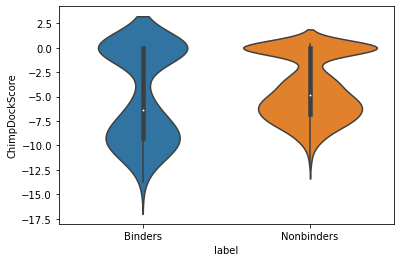

In [37]:
fig = sns.violinplot(tmp_df["label"], tmp_df["ChimpDockScore"])

In [38]:
fig_chimpdockscore = fig.get_figure()

In [39]:
fig_chimpdockscore.savefig('fig_chimpdockscore.png',dpi=600)

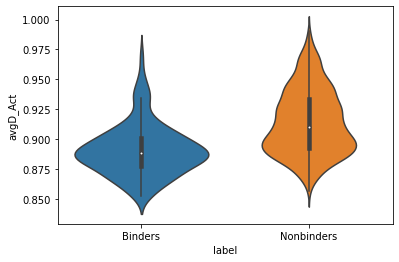

In [40]:
fig2 = sns.violinplot(tmp_df["label"], tmp_df["avgD_Act"])

In [41]:
fig_avgD_Act = fig2.get_figure()

In [42]:
fig_avgD_Act.savefig('fig_avgD_Act.png',dpi=600)

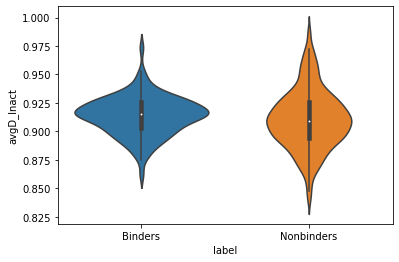

In [43]:
fig3 = sns.violinplot(tmp_df["label"], tmp_df["avgD_Inact"])

In [44]:
fig_avgD_Inact = fig3.get_figure()

In [45]:
fig_avgD_Inact.savefig('fig_avgD_Inact.png',dpi=600)

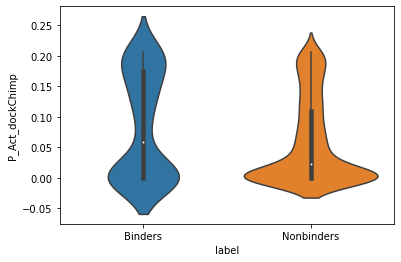

In [46]:
fig4 = sns.violinplot(tmp_df["label"], tmp_df["P_Act_dockChimp"])

In [47]:
fig_P_Act_dockChimp = fig4.get_figure()

In [48]:
fig_P_Act_dockChimp.savefig('fig_P_Act_dockChimp.png',dpi=600)

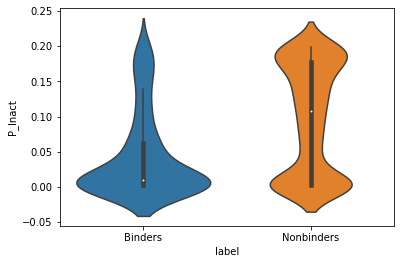

In [49]:
fig5 = sns.violinplot(tmp_df["label"], tmp_df["P_Inact"])

In [50]:
fig_P_Inact = fig5.get_figure()

In [51]:
fig_P_Inact.savefig('fig_P_Inact.png',dpi=600)

Balance dataset by numbers of binders/nonbinders

In [52]:
bal_df = tmp_df

In [53]:
g = bal_df.groupby('bindingClass')
g = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

s_sd_Canonical\_QSARr  ...       label
bindingClass                                              ...            
0            0                                       NaN  ...  Nonbinders
             1                                OCc1ccccc1  ...  Nonbinders
             2                   N#CSCSc1[n]c2ccccc2[s]1  ...  Nonbinders
             3                             OC(=O)C(Cl)Cl  ...  Nonbinders
             4                   O=C1NS(=O)(=O)c2ccccc12  ...  Nonbinders
...                                                  ...  ...         ...
1            200  CCOC(=O)C(O)(c1ccc(Cl)cc1)c1ccc(Cl)cc1  ...     Binders
             201                                     NaN  ...     Binders
             202                                     NaN  ...     Binders
             203              CC(=Cc1ccccc1)[N+]([O-])=O  ...     Binders
             204               OC(=O)C1C(C2CCC1O2)C(O)=O  ...     Binders

[410 rows x 27 columns]
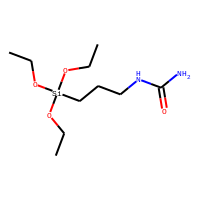
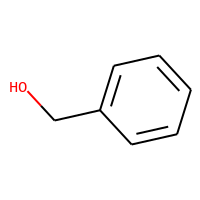
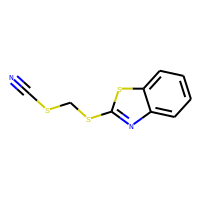
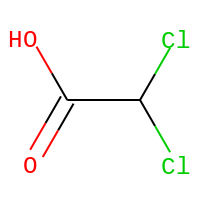
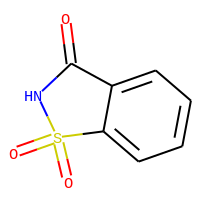
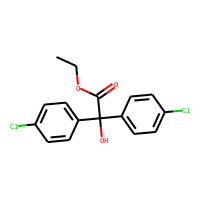
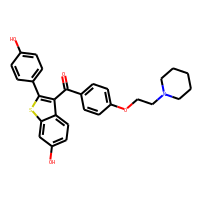
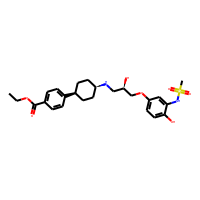
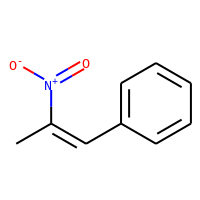
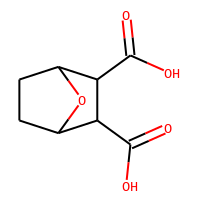

In [54]:
g

s_sd_Canonical\_QSARr  ...       label
bindingClass                             ...            
0            0                      NaN  ...  Nonbinders
             1               OCc1ccccc1  ...  Nonbinders
             2  N#CSCSc1[n]c2ccccc2[s]1  ...  Nonbinders
             3            OC(=O)C(Cl)Cl  ...  Nonbinders
             4  O=C1NS(=O)(=O)c2ccccc12  ...  Nonbinders

[5 rows x 27 columns]
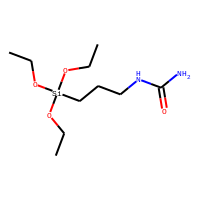
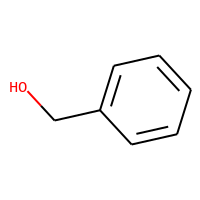
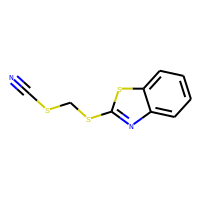
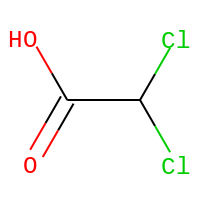
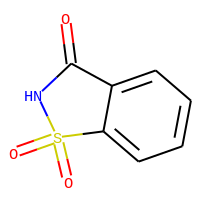

In [55]:
g.head()

In [56]:
g.shape

(410, 27)

In [57]:
user_specified_features = ['HumDockScore','RatDockScore','ChimpDockScore','AVG','P_Act_dockChimp','P_Inact','PredBayes','ratio','avgD_Act','avgD_Inact','PredBindingClass','predMLogR']

In [58]:
from itertools import islice
from IPython.display import Image, display, HTML

In [59]:
import tempfile, shutil

Featurizer using own features (user_specified_features)

In [60]:
featurizer = dc.feat.UserDefinedFeaturizer(user_specified_features)

In [61]:
#featurizer = dc.feat.base_classes.UserDefinedFeaturizer(user_specified_features)

In [62]:
#loader = dc.data.data_loader.CSVLoader(
loader = dc.data.UserCSVLoader(
      #tasks=["bindingClass"], smiles_field=['SMILES'], id_field=["casrn"],
      tasks=["bindingClass"], id_field="casrn",
      featurizer=featurizer)

In [63]:
g.to_csv('balanced.csv',index=False)

In [64]:
g.columns

Index(['s_sd_Canonical\_QSARr', 's_m_title', 'HumDockScore', 'RatDockScore',
       'ChimpDockScore', 'AVG', 'bindingClass', 'P_Act_dockChimp', 'P_Inact',
       'PredBayes', 'ratio', 'cas', 'casrn', 'cid', 'gsid',
       'dsstox_substance_id', 'preferred_name', 'SMILES', 'InChI_Code_QSARr',
       'InChI Key_QSARr', 'BindingClass', 'avgD_Act', 'avgD_Inact',
       'PredBindingClass', 'predMLogR', 'Mol', 'label'],
      dtype='object')

HumDockScore  ...       label
bindingClass                    ...            
0            0        0.000000  ...  Nonbinders
             1       -6.297646  ...  Nonbinders
             2       -6.413531  ...  Nonbinders
             3       -3.811233  ...  Nonbinders
             4       -6.697701  ...  Nonbinders
...                        ...  ...         ...
1            200    -10.712689  ...     Binders
             201      0.000000  ...     Binders
             202      0.000000  ...     Binders
             203     -6.397957  ...     Binders
             204     -7.465131  ...     Binders

[410 rows x 17 columns]
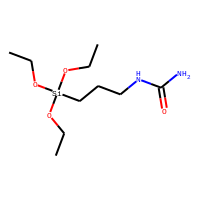
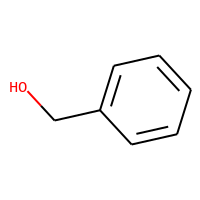
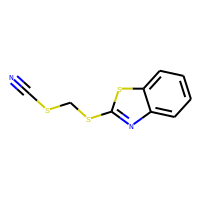
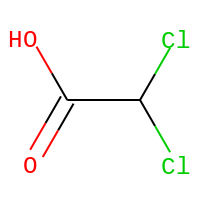
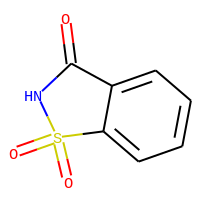
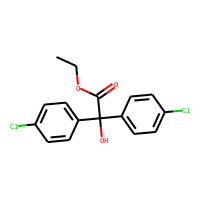
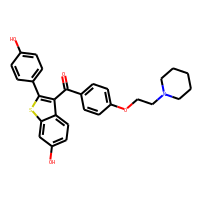
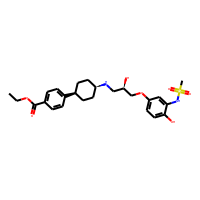
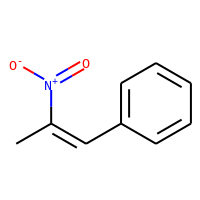
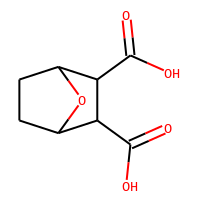

In [65]:
g.drop(columns=['s_sd_Canonical\_QSARr','s_m_title','cas','cid', 'gsid',
       'dsstox_substance_id', 'preferred_name','InChI_Code_QSARr',
       'InChI Key_QSARr', 'BindingClass'])

In [66]:
g.to_csv('balanced_droppedcols.csv',index=False)

In [67]:
#dataset_file = "test.csv"

In [68]:
#dataset = pd.read_csv("balanced_droppedcols.csv")

In [69]:
#user_specified_features = ['MW','AlogP','HBA','HBD','RB','HeavyAtomCount','ChiralCenterCount','ChiralCenterCountAllPossible','RingCount','PSA','Estate','MR','Polar','sLi_Key','ssBe_Key','ssssBem_Key','sBH2_Key','ssBH_Key','sssB_Key','ssssBm_Key','sCH3_Key','dCH2_Key','ssCH2_Key','tCH_Key','dsCH_Key','aaCH_Key','sssCH_Key','ddC_Key','tsC_Key','dssC_Key','aasC_Key','aaaC_Key','ssssC_Key','sNH3_Key','sNH2_Key','ssNH2_Key','dNH_Key','ssNH_Key','aaNH_Key','tN_Key','sssNH_Key','dsN_Key','aaN_Key','sssN_Key','ddsN_Key','aasN_Key','ssssN_Key','daaN_Key','sOH_Key','dO_Key','ssO_Key','aaO_Key','aOm_Key','sOm_Key','sF_Key','sSiH3_Key','ssSiH2_Key','sssSiH_Key','ssssSi_Key','sPH2_Key','ssPH_Key','sssP_Key','dsssP_Key','ddsP_Key','sssssP_Key','sSH_Key','dS_Key','ssS_Key','aaS_Key','dssS_Key','ddssS_Key','ssssssS_Key','Sm_Key','sCl_Key','sGeH3_Key','ssGeH2_Key','sssGeH_Key','ssssGe_Key','sAsH2_Key','ssAsH_Key','sssAs_Key','dsssAs_Key','ddsAs_Key','sssssAs_Key','sSeH_Key','dSe_Key','ssSe_Key','aaSe_Key','dssSe_Key','ssssssSe_Key','ddssSe_Key','sBr_Key','sSnH3_Key','ssSnH2_Key','sssSnH_Key','ssssSn_Key','sI_Key','sPbH3_Key','ssPbH2_Key','sssPbH_Key','ssssPb_Key','sLi_Cnt','ssBe_Cnt','ssssBem_Cnt','sBH2_Cnt','ssBH_Cnt','sssB_Cnt','ssssBm_Cnt','sCH3_Cnt','dCH2_Cnt','ssCH2_Cnt','tCH_Cnt','dsCH_Cnt','aaCH_Cnt','sssCH_Cnt','ddC_Cnt','tsC_Cnt','dssC_Cnt','aasC_Cnt','aaaC_Cnt','ssssC_Cnt','sNH3_Cnt','sNH2_Cnt','ssNH2_Cnt','dNH_Cnt','ssNH_Cnt','aaNH_Cnt','tN_Cnt','sssNH_Cnt','dsN_Cnt','aaN_Cnt','sssN_Cnt','ddsN_Cnt','aasN_Cnt','ssssN_Cnt','daaN_Cnt','sOH_Cnt','dO_Cnt','ssO_Cnt','aaO_Cnt','aOm_Cnt','sOm_Cnt','sF_Cnt','sSiH3_Cnt','ssSiH2_Cnt','sssSiH_Cnt','ssssSi_Cnt','sPH2_Cnt','ssPH_Cnt','sssP_Cnt','dsssP_Cnt','ddsP_Cnt','sssssP_Cnt','sSH_Cnt','dS_Cnt','ssS_Cnt','aaS_Cnt','dssS_Cnt','ddssS_Cnt','ssssssS_Cnt','Sm_Cnt','sCl_Cnt','sGeH3_Cnt','ssGeH2_Cnt','sssGeH_Cnt','ssssGe_Cnt','sAsH2_Cnt','ssAsH_Cnt','sssAs_Cnt','dsssAs_Cnt','ddsAs_Cnt','sssssAs_Cnt','sSeH_Cnt','dSe_Cnt','ssSe_Cnt','aaSe_Cnt','dssSe_Cnt','ssssssSe_Cnt','ddssSe_Cnt','sBr_Cnt','sSnH3_Cnt','ssSnH2_Cnt','sssSnH_Cnt','ssssSn_Cnt','sI_Cnt','sPbH3_Cnt','ssPbH2_Cnt','sssPbH_Cnt','ssssPb_Cnt','sLi_Sum','ssBe_Sum','ssssBem_Sum','sBH2_Sum','ssBH_Sum','sssB_Sum','ssssBm_Sum','sCH3_Sum','dCH2_Sum','ssCH2_Sum','tCH_Sum','dsCH_Sum','aaCH_Sum','sssCH_Sum','ddC_Sum','tsC_Sum','dssC_Sum','aasC_Sum','aaaC_Sum','ssssC_Sum','sNH3_Sum','sNH2_Sum','ssNH2_Sum','dNH_Sum','ssNH_Sum','aaNH_Sum','tN_Sum','sssNH_Sum','dsN_Sum','aaN_Sum','sssN_Sum','ddsN_Sum','aasN_Sum','ssssN_Sum','daaN_Sum','sOH_Sum','dO_Sum','ssO_Sum','aaO_Sum','aOm_Sum','sOm_Sum','sF_Sum','sSiH3_Sum','ssSiH2_Sum','sssSiH_Sum','ssssSi_Sum','sPH2_Sum','ssPH_Sum','sssP_Sum','dsssP_Sum','ddsP_Sum','sssssP_Sum','sSH_Sum','dS_Sum','ssS_Sum','aaS_Sum','dssS_Sum','ddssS_Sum','ssssssS_Sum','Sm_Sum','sCl_Sum','sGeH3_Sum','ssGeH2_Sum','sssGeH_Sum','ssssGe_Sum','sAsH2_Sum','ssAsH_Sum','sssAs_Sum','dsssAs_Sum','ddsAs_Sum','sssssAs_Sum','sSeH_Sum','dSe_Sum','ssSe_Sum','aaSe_Sum','dssSe_Sum','ssssssSe_Sum','ddssSe_Sum','sBr_Sum','sSnH3_Sum','ssSnH2_Sum','sssSnH_Sum','ssssSn_Sum','sI_Sum','sPbH3_Sum','ssPbH2_Sum','sssPbH_Sum','ssssPb_Sum','sLi_Avg','ssBe_Avg','ssssBem_Avg','sBH2_Avg','ssBH_Avg','sssB_Avg','ssssBm_Avg','sCH3_Avg','dCH2_Avg','ssCH2_Avg','tCH_Avg','dsCH_Avg','aaCH_Avg','sssCH_Avg','ddC_Avg','tsC_Avg','dssC_Avg','aasC_Avg','aaaC_Avg','ssssC_Avg','sNH3_Avg','sNH2_Avg','ssNH2_Avg','dNH_Avg','ssNH_Avg','aaNH_Avg','tN_Avg','sssNH_Avg','dsN_Avg','aaN_Avg','sssN_Avg','ddsN_Avg','aasN_Avg','ssssN_Avg','daaN_Avg','sOH_Avg','dO_Avg','ssO_Avg','aaO_Avg','aOm_Avg','sOm_Avg','sF_Avg','sSiH3_Avg','ssSiH2_Avg','sssSiH_Avg','ssssSi_Avg','sPH2_Avg','ssPH_Avg','sssP_Avg','dsssP_Avg','ddsP_Avg','sssssP_Avg','sSH_Avg','dS_Avg','ssS_Avg','aaS_Avg','dssS_Avg','ddssS_Avg','ssssssS_Avg','Sm_Avg','sCl_Avg','sGeH3_Avg','ssGeH2_Avg','sssGeH_Avg','ssssGe_Avg','sAsH2_Avg','ssAsH_Avg','sssAs_Avg','dsssAs_Avg','ddsAs_Avg','sssssAs_Avg','sSeH_Avg','dSe_Avg','ssSe_Avg','aaSe_Avg','dssSe_Avg','ssssssSe_Avg','ddssSe_Avg','sBr_Avg','sSnH3_Avg','ssSnH2_Avg','sssSnH_Avg','ssssSn_Avg','sI_Avg','sPbH3_Avg','ssPbH2_Avg','sssPbH_Avg','ssssPb_Avg','First Zagreb (ZM1)','First Zagreb index by valence vertex degrees (ZM1V)','Second Zagreb (ZM2)','Second Zagreb index by valence vertex degrees (ZM2V)','Polarity (Pol)','Narumi Simple Topological (NST)','Narumi Harmonic Topological (NHT)','Narumi Geometric Topological (NGT)','Total structure connectivity (TSC)','Wiener (W)','Mean Wiener (MW)','Xu (Xu)','Quadratic (QIndex)','Radial centric (RC)','Mean Square Distance Balaban (MSDB)','Superpendentic (SP)','Harary (Har)','Log of product of row sums (LPRS)','Pogliani (Pog)','Schultz Molecular Topological (SMT)','Schultz Molecular Topological by valence vertex degrees (SMTV)','Mean Distance Degree Deviation (MDDD)','Ramification (Ram)','Gutman Molecular Topological (GMT)','Gutman MTI by valence vertex degrees (GMTV)','Average vertex distance degree (AVDD)','Unipolarity (UP)','Centralization (CENT)','Variation (VAR)','Molecular electrotopological variation (MEV)','Maximal electrotopological positive variation (MEPV)','Maximal electrotopological negative variation (MENV)','Eccentric connectivity (ECCc)','Eccentricity (ECC)','Average eccentricity (AECC)','Eccentric (DECC)','Valence connectivity index chi-0 (vX0)','Valence connectivity index chi-1 (vX1)','Valence connectivity index chi-2 (vX2)','Valence connectivity index chi-3 (vX3)','Valence connectivity index chi-4 (vX4)','Valence connectivity index chi-5 (vX5)','Average valence connectivity index chi-0 (AvX0)','Average valence connectivity index chi-1 (AvX1)','Average valence connectivity index chi-2 (AvX2)','Average valence connectivity index chi-3 (AvX3)','Average valence connectivity index chi-4 (AvX4)','Average valence connectivity index chi-5 (AvX5)','Quasi Wiener (QW)','First Mohar (FM)','Second Mohar (SM)','Spanning tree number (STN)','Kier benzene-likeliness index (KBLI)','Topological charge index of order 1 (TCI1)','Topological charge index of order 2 (TCI2)','Topological charge index of order 3 (TCI3)','Topological charge index of order 4 (TCI4)','Topological charge index of order 5 (TCI5)','Topological charge index of order 6 (TCI6)','Topological charge index of order 7 (TCI7)','Topological charge index of order 8 (TCI8)','Topological charge index of order 9 (TCI9)','Topological charge index of order 10 (TCI10)','Mean topological charge index of order 1 (MTCI1)','Mean topological charge index of order 2 (MTCI2)','Mean topological charge index of order 3 (MTCI3)','Mean topological charge index of order 4 (MTCI4)','Mean topological charge index of order 5 (MTCI5)','Mean topological charge index of order 6 (MTCI6)','Mean topological charge index of order 7 (MTCI7)','Mean topological charge index of order 8 (MTCI8)','Mean topological charge index of order 9 (MTCI9)','Mean topological charge index of order 10 (MTCI10)','Global topological charge (GTC)','Hyper-distance-path index (HDPI)','Reciprocal hyper-distance-path index (RHDPI)','Square reciprocal distance sum (SRDS)','Modified Randic connectivity (MRC)','Balaban centric (BC)','Lopping centric (LC)','Kier Hall electronegativity (KHE)','Sum of topological distances between N..N (STD(N N))','Sum of topological distances between N..O (STD(N O))','Sum of topological distances between N..S (STD(N S))','Sum of topological distances between N..P (STD(N P))','Sum of topological distances between N..F (STD(N F))','Sum of topological distances between N..Cl (STD(N Cl))','Sum of topological distances between N..Br (STD(N Br))','Sum of topological distances between N..I (STD(N I))','Sum of topological distances between O..O (STD(O O))','Sum of topological distances between O..S (STD(O S))','Sum of topological distances between O..P (STD(O P))','Sum of topological distances between O..F (STD(O F))','Sum of topological distances between O..Cl (STD(O Cl))','Sum of topological distances between O..Br (STD(O Br))','Sum of topological distances between O..I (STD(O I))','Sum of topological distances between S..S (STD(S S))','Sum of topological distances between S..P (STD(S P))','Sum of topological distances between S..F (STD(S F))','Sum of topological distances between S..Cl (STD(S Cl))','Sum of topological distances between S..Br (STD(S Br))','Sum of topological distances between S..I (STD(S I))','Sum of topological distances between P..P (STD(P P))','Sum of topological distances between P..F (STD(P F))','Sum of topological distances between P..Cl (STD(P Cl))','Sum of topological distances between P..Br (STD(P Br))','Sum of topological distances between P..I (STD(P I))','Sum of topological distances between F..F (STD(F F))','Sum of topological distances between F..Cl (STD(F Cl))','Sum of topological distances between F..Br (STD(F Br))','Sum of topological distances between F..I (STD(F I))','Sum of topological distances between Cl..Cl (STD(Cl Cl))','Sum of topological distances between Cl..Br (STD(Cl Br))','Sum of topological distances between Cl..I (STD(Cl I))','Sum of topological distances between Br..Br (STD(Br Br))','Sum of topological distances between Br..I (STD(Br I))','Sum of topological distances between I..I (STD(I I))','Wiener-type index from Z weighted distance matrix - Barysz matrix (WhetZ)','Wiener-type index from electronegativity weighted distance matrix (Whete)','Wiener-type index from mass weighted distance matrix (Whetm)','Wiener-type index from van der waals weighted distance matrix (Whetv)','Wiener-type index from polarizability weighted distance matrix (Whetp)','Balaban-type index from Z weighted distance matrix - Barysz matrix (JhetZ)','Balaban-type index from electronegativity weighted distance matrix (Jhete)','Balaban-type index from mass weighted distance matrix (Jhetm)','Balaban-type index from van der waals weighted distance matrix (Jhetv)','Balaban-type index from polarizability weighted distance matrix (Jhetp)','Topological diameter (TD)','Topological radius (TR)','Petitjean 2D shape (PJ2DS)','Balaban distance connectivity index (J)','Solvation connectivity index chi-0 (SCIX0)','Solvation connectivity index chi-1 (SCIX1)','Solvation connectivity index chi-2 (SCIX2)','Solvation connectivity index chi-3 (SCIX3)','Solvation connectivity index chi-4 (SCIX4)','Solvation connectivity index chi-5 (SCIX5)','Connectivity index chi-0 (CIX0)','Connectivity chi-1 [Randic connectivity] (CIX1)','Connectivity index chi-2 (CIX2)','Connectivity index chi-3 (CIX3)','Connectivity index chi-4 (CIX4)','Connectivity index chi-5 (CIX5)','Average connectivity index chi-0 (ACIX0)','Average connectivity index chi-1 (ACIX1)','Average connectivity index chi-2 (ACIX2)','Average connectivity index chi-3 (ACIX3)','Average connectivity index chi-4 (ACIX4)','Average connectivity index chi-5 (ACIX5)','reciprocal distance Randic-type index (RDR)','reciprocal distance square Randic-type index (RDSR)','1-path Kier alpha-modified shape index (KAMS1)','2-path Kier alpha-modified shape index (KAMS2)','3-path Kier alpha-modified shape index (KAMS3)','Kier flexibility (KF)','path/walk 2 - Randic shape index (RSIpw2)','path/walk 3 - Randic shape index (RSIpw3)','path/walk 4 - Randic shape index (RSIpw4)','path/walk 5 - Randic shape index (RSIpw5)','E-state topological parameter (ETP)','Ring Count 3 (RNGCNT3)','Ring Count 4 (RNGCNT4)','Ring Count 5 (RNGCNT5)','Ring Count 6 (RNGCNT6)','Ring Count 7 (RNGCNT7)','Ring Count 8 (RNGCNT8)','Ring Count 9 (RNGCNT9)','Ring Count 10 (RNGCNT10)','Ring Count 11 (RNGCNT11)','Ring Count 12 (RNGCNT12)','Ring Count 13 (RNGCNT13)','Ring Count 14 (RNGCNT14)','Ring Count 15 (RNGCNT15)','Ring Count 16 (RNGCNT16)','Ring Count 17 (RNGCNT17)','Ring Count 18 (RNGCNT18)','Ring Count 19 (RNGCNT19)','Ring Count 20 (RNGCNT20)','Atom Count (ATMCNT)','Bond Count (BNDCNT)','Atoms in Ring System (ATMRNGCNT)','Bonds in Ring System (BNDRNGCNT)','Cyclomatic number (CYCLONUM)','Number of ring systems (NRS)','Normalized number of ring systems (NNRS)','Ring Fusion degree (RFD)','Ring perimeter (RNGPERM)','Ring bridge count (RNGBDGE)','Molecule cyclized degree (MCD)','Ring Fusion density (RFDELTA)','Ring complexity index (RCI)','Van der Waals surface area (VSA)','MR1 (MR1)','MR2 (MR2)','MR3 (MR3)','MR4 (MR4)','MR5 (MR5)','MR6 (MR6)','MR7 (MR7)','MR8 (MR8)','ALOGP1 (ALOGP1)','ALOGP2 (ALOGP2)','ALOGP3 (ALOGP3)','ALOGP4 (ALOGP4)','ALOGP5 (ALOGP5)','ALOGP6 (ALOGP6)','ALOGP7 (ALOGP7)','ALOGP8 (ALOGP8)','ALOGP9 (ALOGP9)','ALOGP10 (ALOGP10)','PEOE1 (PEOE1)','PEOE2 (PEOE2)','PEOE3 (PEOE3)','PEOE4 (PEOE4)','PEOE5 (PEOE5)','PEOE6 (PEOE6)','PEOE7 (PEOE7)','PEOE8 (PEOE8)','PEOE9 (PEOE9)','PEOE10 (PEOE10)','PEOE11 (PEOE11)','PEOE12 (PEOE12)','PEOE13 (PEOE13)','PEOE14 (PEOE14)']

In [70]:
#current_dir = os.path.dirname(os.path.realpath("__file__"))
#dc.utils.download_url("https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/desc_canvas_aug30.csv",
#                      current_dir)
#dataset_file = "desc_canvas_aug30.csv"

Re-upload training set, now balanced, and with less properties



In [71]:
current_dir = os.path.dirname(os.path.realpath("__file__"))
dc.utils.download_url("https://hermes.chem.ut.ee/~alfx/ML/balanced_droppedcols1.csv",  current_dir)

In [72]:
dataset_file = "balanced_droppedcols1.csv"

In [73]:
dataset = loader.featurize(dataset_file)

/content/deepchem/deepchem/data/data_loader.py:264: FutureWarning: featurize() is deprecated and has been renamed to create_dataset(). featurize() will be removed in DeepChem 3.0
  FutureWarning)


In [74]:
#dataset = loader.featurize(f)

In [75]:
dataset

<DiskDataset X.shape: (410, 12), y.shape: (410, 1), w.shape: (410, 1), ids: ['87546-18-7' '125-84-8' '695-06-7' ... '145-73-3' '52806-53-8'
 '114369-43-6'], task_names: ['bindingClass']>

Download evaluation set

In [76]:
current_dir = os.path.dirname(os.path.realpath("__file__"))
dc.utils.download_url("https://hermes.chem.ut.ee/~alfx/ML/Eval_4.csv",  current_dir)

In [77]:
eval_df = pd.read_csv("Eval_4.csv")

In [78]:
eval_df

,casrn,ChimpDockScore,HumDockScore,RatDockScore,AVG,bindingClass,P_Act_dockChimp,P_Inact,PredBayes,ratio,BindingClass,cid,cas,id,avgD_Act,avgD_Inact,PredBindingClass,predMLogR
0,100-06-1,-5.799919,0.0,0.0,-5.799919,0,0.056889,0.197769,0,0.287655,0,7476,100-06-1,2905,0.8815,0.8771,0,0.032257
1,100-10-7,-6.024903,0.0,0.0,-6.024903,0,0.068054,0.198405,0,0.343006,0,7479,100-10-7,2910,0.9047,0.9107,0,0.032288
2,100-11-8,-5.444213,0.0,0.0,-5.444213,0,0.041694,0.191803,0,0.217380,0,66011,100-11-8,2736,0.8991,0.9070,0,0.041337
3,100-14-1,-5.627005,0.0,0.0,-5.627005,0,0.049119,0.195610,0,0.251107,0,7482,100-14-1,2229,0.8901,0.9020,0,0.069511
4,100-18-5,-7.552393,0.0,0.0,-7.552393,0,0.160978,0.145590,1,1.105699,0,7486,100-18-5,2515,0.9059,0.9094,0,0.057763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,99614-02-5,-9.092566,0.0,0.0,-9.092566,0,0.204732,0.059381,1,3.447757,0,4595,99614-02-5,1760,0.8920,0.9082,0,0.359556
3878,99617-34-2,-6.485924,0.0,0.0,-6.485924,0,0.094205,0.192047,0,0.490531,0,9928181,99617-34-2,908,0.8947,0.9056,0,0.069175
3879,99665-00-6,-1.354963,0.0,0.0,-1.354963,0,0.000105,0.014222,0,0.007360,0,20056549,99665-00-6,1881,0.9088,0.9147,0,0.092869
3880,998-40-3,-4.579625,0.0,0.0,-4.579625,0,0.017028,0.156247,0,0.108983,0,13831,998-40-3,3189,0.9433,0.9301,0,0.003165


In [79]:
bal_eval = eval_df

In [80]:
eval_dataset_file = "Eval_4.csv"

In [81]:
eval_dataset = loader.featurize(eval_dataset_file)

/content/deepchem/deepchem/data/data_loader.py:264: FutureWarning: featurize() is deprecated and has been renamed to create_dataset(). featurize() will be removed in DeepChem 3.0
  FutureWarning)


In [82]:
#bal_eval = eval_df.groupby('bindingClass')
#bal_eval = pd.DataFrame(eval_df.apply(lambda x: x.sample(eval_df.size().min()).reset_index(drop=True)))

In [83]:
valid_dataset = eval_dataset

,s_sd_Canonical\_QSARr,s_m_title,HumDockScore,RatDockScore,ChimpDockScore,AVG,bindingClass,P_Act_dockChimp,P_Inact,PredBayes,ratio,cas,casrn,cid,gsid,dsstox_substance_id,preferred_name,SMILES,InChI_Code_QSARr,InChI Key_QSARr,BindingClass,avgD_Act,avgD_Inact,PredBindingClass,predMLogR,Mol,label
0,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1C[...,50-27-1,-12.086825,-11.416709,-13.790830,-12.431455,1,0.008682,0.000102,1,84.806906,50-27-1,50-27-1,2366,22366,DTXSID9022366,Estriol,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1C[...,InChI=1S/C18H24O3/c1-18-7-6-13-12-5-3-11(19)8-...,PROQIPRRNZUXQM-ZXXIGWHRSA-N,1,0.8676,0.9291,0.957575,1,,Binders
1,CC(Cc1cc(O)c(O)cc1)C(C)Cc1cc(O)c(O)cc1,500-38-9,-12.436467,-12.085485,-12.801535,-12.441162,1,0.027501,0.000616,1,44.672972,500-38-9,500-38-9,2437,22437,DTXSID5022437,Nordihydroguaiaretic acid,CC(Cc1cc(O)c(O)cc1)C(C)Cc1cc(O)c(O)cc1,InChI=1S/C18H22O4/c1-11(7-13-3-5-15(19)17(21)9...,HCZKYJDFEPMADG-UHFFFAOYSA-N,1,0.8877,0.8946,0.244343,0,,Binders
2,C[C@]12CC[C@H]3[C@@H](CC[C@H]4CC(=O)CC[C@@]43C...,521-18-6,-10.234326,0.000000,-12.382423,-7.538916,1,0.041440,0.001224,1,33.866977,521-18-6,521-18-6,2364,22364,DTXSID9022364,5alpha-Dihydrotestosterone,C[C@]12CC[C@H]3[C@@H](CC[C@H]4CC(=O)CC[C@@]43C...,InChI=1S/C19H30O2/c1-18-9-7-13(20)11-12(18)3-4...,NVKAWKQGWWIWPM-ABEVXSGRSA-N,1,0.8909,0.9404,0.840149,1,,Binders
3,NaN,DB06710,0.000000,0.000000,-12.004982,-4.001661,1,0.057602,0.002189,1,26.319556,NaN,DB06710,NaN,NaN,NaN,NaN,CC12CCC3C(CCC4=CC(=O)CCC43C)C1CCC2(C)O,InChI=1S/C20H30O2/c1-18-9-6-14(21)12-13(18)4-5...,GCKMFJBGXUYNAG-UHFFFAOYSA-N,1,0.8585,0.9245,0.978790,1,,Binders
4,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1CC...,50-28-2,-10.560744,-10.890292,-11.979087,-11.143374,1,0.058836,0.002275,1,25.865744,50-28-2,50-28-2,573,20573,DTXSID0020573,17beta-Estradiol,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc43)[C@@H]1CC...,InChI=1S/C18H24O2/c1-18-9-8-14-13-5-3-12(19)10...,VOXZDWNPVJITMN-ZBRFXRBCSA-N,1,0.8610,0.9286,0.979430,1,,Binders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,NaN,NOCAS_48509,0.000000,0.000000,0.000000,0.000000,0,0.000005,0.002410,0,0.002242,NaN,NOCAS_48509,28483,48509,DTXSID0048509,PharmaGSID_48509,CCCN(C1CCN(CC1)C(=O)C1CCNCC1)[C@H]1Cc2cc(ccc2C...,InChI=1S/C25H39N3O2/c1-3-14-28(23-6-4-19-5-7-2...,KTAULCNFQYFKTN-HSZRJFAPSA-N,0,0.8805,0.8947,0.320631,0,,Nonbinders
1462,Cc1ccc(c(Cl)c1)C(=O)NS(=O)(=O)/C=C/c1ccc(cc1)OC,NOCAS_48514,-7.993627,0.000000,0.000000,-2.664542,0,0.000005,0.002410,0,0.002242,NaN,NOCAS_48514,28488,48514,DTXSID9048514,PharmaGSID_48514,Cc1ccc(c(Cl)c1)C(=O)NS(=O)(=O)/C=C/c1ccc(cc1)OC,InChI=1S/C17H16ClNO4S/c1-12-3-8-15(16(18)11-12...,WGDPLICUMTVYDB-MDZDMXLPSA-N,0,0.8877,0.8937,0.178343,0,,Nonbinders
1463,O=C(NS(=O)(=O)/C=C/c1ccccc1)c1ccc(F)cc1Cl,NOCAS_48516,-10.280437,0.000000,0.000000,-3.426812,0,0.000005,0.002410,0,0.002242,NaN,NOCAS_48516,28490,48516,DTXSID9048516,PharmaGSID_48516,O=C(NS(=O)(=O)/C=C/c1ccccc1)c1ccc(F)cc1Cl,InChI=1S/C15H11ClFNO3S/c16-14-10-12(17)6-7-13(...,AUMLVMKWJGCERZ-CMDGGOBGSA-N,0,0.8958,0.8995,0.125889,0,,Nonbinders
1464,O=C(NS(=O)(=O)/C=C/c1ccc[s]1)c1ccc(F)cc1Br,NOCAS_48518,-9.405784,0.000000,0.000000,-3.135261,0,0.000005,0.002410,0,0.002242,NaN,NOCAS_48518,28492,48518,DTXSID9048518,PharmaGSID_48518,O=C(NS(=O)(=O)/C=C/c1ccc[s]1)c1ccc(F)cc1Br,InChI=1S/C13H9BrFNO3S2/c14-12-8-9(15)3-4-11(12...,QXWJDGMLSMFETH-FNORWQNLSA-N,0,0.9155,0.9161,0.059053,0,,Nonbinders

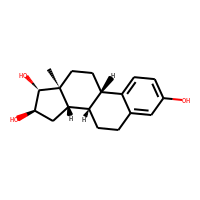
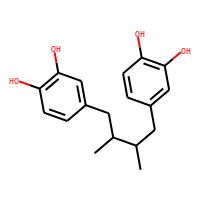
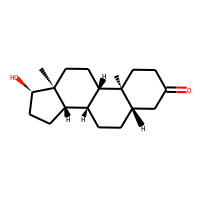
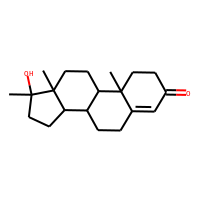
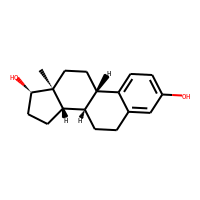
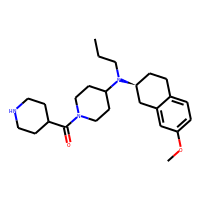
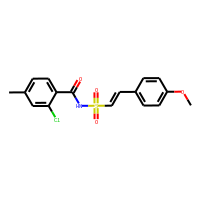
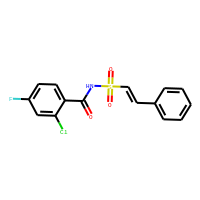
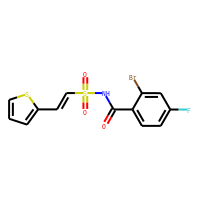
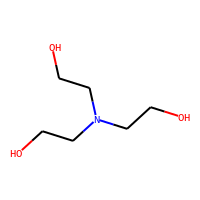

In [84]:
tmp_df

In [85]:
tmp_df.to_csv('tmp_df.csv', index=False)


In [86]:
tmp_dataset_file = "tmp_df.csv"

In [87]:
tmp_dataset = loader.featurize(tmp_dataset_file)

/content/deepchem/deepchem/data/data_loader.py:264: FutureWarning: featurize() is deprecated and has been renamed to create_dataset(). featurize() will be removed in DeepChem 3.0
  FutureWarning)


In [88]:
transformers = [
    dc.trans.NormalizationTransformer(transform_X=True, dataset=dataset),
    dc.trans.ClippingTransformer(transform_X=True, dataset=dataset)]
#datasets = [dataset]
#datasets = [dataset,eval_df]
datasets = [dataset, valid_dataset, tmp_dataset]
for i, dataset in enumerate(datasets):
  for transformer in transformers:
      datasets[i] = transformer.transform(dataset)
#train_dataset = datasets
#train_dataset, eval_dataset = datasets
train_dataset, valid_dataset, tmp_dataset = datasets

Fit Random Forrest Classifier and optimize hyperparameters

In [89]:
from sklearn.ensemble import RandomForestClassifier

def rf_model_builder(model_params, model_dir):
  sklearn_model = RandomForestClassifier(**model_params)
  return dc.models.SklearnModel(sklearn_model, model_dir='models')
params_dict = {
    "n_estimators": [10, 50, 100, 250, 500],
    "max_features": ["auto", "sqrt", "log2", None],
}

metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
optimizer = dc.hyper.GridHyperparamOpt(rf_model_builder)
best_rf, best_rf_hyperparams, all_rf_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)



TypeError: ignored

In [ ]:
best_rf.save()

In [ ]:
pred = best_rf.predict(tmp_dataset)

In [ ]:
pred.shape

In [ ]:
pred_df = pd.DataFrame(pred)

In [ ]:
pred_df.head

Fit and optimize Deep Neural Network

In [ ]:
import numpy as np
#import np.random

params_dict = {"learning_rate": np.power(10., np.random.uniform(-5, -3, size=1)),
               "weight_decay_penalty": np.power(10, np.random.uniform(-6, -4, size=1)),
               "nb_epoch": [40] }
n_features = train_dataset.get_data_shape()[0]
def model_builder(model_params, model_dir):
  model = dc.models.MultitaskClassifier(
    1, n_features, layer_sizes=[1000], dropouts=.25,
    batch_size=50, **model_params)
  return model

#train_dataset = dc.data.NumpyDataset(train_dataset.X, train_dataset.y, train_dataset.w, train_dataset.ids)

optimizer = dc.hyper.GridHyperparamOpt(model_builder)
best_dnn, best_dnn_hyperparams, all_dnn_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)

In [ ]:
from deepchem.utils.evaluate import Evaluator

rf_train_csv_out = "rf_train_classifier.csv"
rf_train_stats_out = "rf_train_stats_classifier.txt"
rf_train_evaluator = Evaluator(best_rf, train_dataset, transformers)
rf_train_score = rf_train_evaluator.compute_model_performance(
    [metric], rf_train_csv_out, rf_train_stats_out)
print("RF Train set AUC %f" % (rf_train_score["roc_auc_score"]))

rf_valid_csv_out = "rf_valid_classifier.csv"
rf_valid_stats_out = "rf_valid_stats_classifier.txt"
rf_valid_evaluator = Evaluator(best_rf, valid_dataset, transformers)
rf_valid_score = rf_valid_evaluator.compute_model_performance(
    [metric], rf_valid_csv_out, rf_valid_stats_out)
print("RF Valid set AUC %f" % (rf_valid_score["roc_auc_score"]))

#rf_test_csv_out = "rf_test_regressor.csv"
#rf_test_stats_out = "rf_test_stats_regressor.txt"
#rf_test_evaluator = Evaluator(best_rf, test_dataset, transformers)

#rf_test_score = rf_test_evaluator.compute_model_performance(
 #   [metric], rf_test_csv_out, rf_test_stats_out)
#print("RF Test set AUC %f" % (rf_test_score["roc_auc_score"]))

#rf_crystal_csv_out = "rf_crystal_regressor.csv"
#rf_crystal_stats_out = "rf_crystal_stats_regressor.txt"
#rf_crystal_evaluator = Evaluator(best_rf, crystal_dataset, transformers)
#rf_crystal_score = rf_crystal_evaluator.compute_model_performance(
#    [metric], rf_crystal_csv_out, rf_crystal_stats_out)
#print("RF Crystal set R^2 %f" % (rf_crystal_score["roc_auc_score"]))

In [ ]:
dnn_train_csv_out = "dnn_train_classifier.csv"
dnn_train_stats_out = "dnn_train_classifier_stats.txt"
dnn_train_evaluator = Evaluator(best_dnn, train_dataset, transformers)
dnn_train_score = dnn_train_evaluator.compute_model_performance(
    [metric], dnn_train_csv_out, dnn_train_stats_out)
print("DNN Train set AUC %f" % (dnn_train_score["roc_auc_score"]))

dnn_valid_csv_out = "dnn_valid_classifier.csv"
dnn_valid_stats_out = "dnn_valid_classifier_stats.txt"
dnn_valid_evaluator = Evaluator(best_dnn, valid_dataset, transformers)
dnn_valid_score = dnn_valid_evaluator.compute_model_performance(
    [metric], dnn_valid_csv_out, dnn_valid_stats_out)
print("DNN Valid set AUC %f" % (dnn_valid_score["roc_auc_score"]))

#dnn_test_csv_out = "dnn_test_classifier.csv"
#dnn_test_stats_out = "dnn_test_classifier_stats.txt"
#dnn_test_evaluator = Evaluator(best_dnn, test_dataset, transformers)
#dnn_test_score = dnn_test_evaluator.compute_model_performance(
#    [metric], dnn_test_csv_out, dnn_test_stats_out)
#print("DNN Test set AUC %f" % (dnn_test_score["roc_auc_score"]))

#dnn_crystal_csv_out = "dnn_crystal_classifier.csv"
#dnn_crystal_stats_out = "dnn_crystal_stats_classifier.txt"
#dnn_crystal_evaluator = Evaluator(best_dnn, crystal_dataset, transformers)
#dnn_crystal_score = dnn_crystal_evaluator.compute_model_performance(
#    [metric], dnn_crystal_csv_out, dnn_crystal_stats_out)
#print("DNN Crystal set AUC %f" % (dnn_crystal_score["roc_auc_score"]))

In [ ]:
#Now regression models
#Make directories to store the raw and featurized datasets.
featurizer = dc.feat.UserDefinedFeaturizer(user_specified_features)
loader = dc.data.UserCSVLoader(
    tasks=["bindingClass"],  id_field="casrn",
    featurizer=featurizer)
train_dataset = loader.featurize(dataset_file)
valid_dataset = loader.featurize(eval_dataset_file)
#crystal_dataset = loader.featurize(crystal_dataset_file)

In [ ]:
print("Number of compounds in train set")
print(len(train_dataset))
print("Number of compounds in validation set")
print(len(valid_dataset))

In [ ]:
transformers = [
    dc.trans.NormalizationTransformer(transform_X=True, dataset=train_dataset),
    dc.trans.ClippingTransformer(transform_X=True, dataset=train_dataset)]

datasets = [train_dataset, valid_dataset]
for i, dataset in enumerate(datasets):
  for transformer in transformers:
      datasets[i] = transformer.transform(dataset)
train_dataset, valid_dataset = datasets

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def rf_model_builder(model_params, model_dir):
  sklearn_model = RandomForestRegressor(**model_params)
  return dc.models.SklearnModel(sklearn_model, model_dir)
params_dict = {
    "n_estimators": [10, 100],
    "max_features": ["auto", "sqrt", "log2", None],
}

metric = dc.metrics.Metric(dc.metrics.r2_score)
optimizer = dc.hyper.GridHyperparamOpt(rf_model_builder)
best_rf, best_rf_hyperparams, all_rf_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)

In [ ]:
import numpy.random

params_dict = {"learning_rate": np.power(10., np.random.uniform(-5, -3, size=2)),
               "weight_decay_penalty": np.power(10, np.random.uniform(-6, -4, size=2)),
               "nb_epoch": [20] }
n_features = train_dataset.get_data_shape()[0]
def model_builder(model_params, model_dir):
  model = dc.models.MultitaskRegressor(
    1, n_features, layer_sizes=[1000], dropouts=[.25],
    batch_size=50, **model_params)
  return model

optimizer = dc.hyper.GridHyperparamOpt(model_builder)
best_dnn, best_dnn_hyperparams, all_dnn_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)

In [ ]:
from deepchem.utils.evaluate import Evaluator

rf_train_csv_out = "rf_train_regressor.csv"
rf_train_stats_out = "rf_train_stats_regressor.txt"
rf_train_evaluator = Evaluator(best_rf, train_dataset, transformers)
rf_train_score = rf_train_evaluator.compute_model_performance(
    [metric], rf_train_csv_out, rf_train_stats_out)
print("RF Train set R^2 %f" % (rf_train_score["r2_score"]))

rf_valid_csv_out = "rf_valid_regressor.csv"
rf_valid_stats_out = "rf_valid_stats_regressor.txt"
rf_valid_evaluator = Evaluator(best_rf, valid_dataset, transformers)
rf_valid_score = rf_valid_evaluator.compute_model_performance(
    [metric], rf_valid_csv_out, rf_valid_stats_out)
print("RF Valid set R^2 %f" % (rf_valid_score["r2_score"]))

In [ ]:
dnn_train_csv_out = "dnn_train_regressor.csv"
dnn_train_stats_out = "dnn_train_regressor_stats.txt"
dnn_train_evaluator = Evaluator(best_dnn, train_dataset, transformers)
dnn_train_score = dnn_train_evaluator.compute_model_performance(
    [metric], dnn_train_csv_out, dnn_train_stats_out)
print("DNN Train set R^2 %f" % (dnn_train_score["r2_score"]))

dnn_valid_csv_out = "dnn_valid_regressor.csv"
dnn_valid_stats_out = "dnn_valid_regressor_stats.txt"
dnn_valid_evaluator = Evaluator(best_dnn, valid_dataset, transformers)
dnn_valid_score = dnn_valid_evaluator.compute_model_performance(
    [metric], dnn_valid_csv_out, dnn_valid_stats_out)
print("DNN Valid set R^2 %f" % (dnn_valid_score["r2_score"]))

In [ ]:
#%matplotlib inline
#from matplotlib import pyplot as plt

#task = "bindingClass"
#rf_predicted_test = best_rf.predict(valid_dataset)
#rf_true_test = valid_dataset.y
#plt.scatter(rf_predicted_test, rf_true_test)
#plt.xlabel('Predicted bindingClass')
#plt.ylabel('Secondary Assay')
#plt.title(r'RF predicted bindingClass vs. Secondary Assay')
#plt.xlim([2, 11])
#plt.ylim([2, 11])
#plt.plot([2, 11], [2, 11], color='k')
#plt.show()

In [ ]:
#task = "bindingClass"
#dnn_predicted_test = best_dnn.predict(valid_dataset, transformers)
#dnn_true_test = valid_dataset.y
#plt.scatter(dnn_predicted_test, dnn_true_test)
#plt.xlabel('Predicted bindingClass')
#plt.ylabel('Secondary Assay')
#plt.title(r'DNN predicted bindingClass vs. Secondary Assay')
#plt.xlim([2, 11])
#plt.ylim([2, 11])
#plt.plot([2, 11], [2, 11], color='k')
#plt.show()